# The World's Hardest Game

Esse projeto realizou a implementação de um algoritmo genético para resolução da primeira fase do jogo ["The World's Hardest Game (WGH)"](https://www.coolmathgames.com/0-worlds-hardest-game), produzido pelo Flash Game Studio. O jogo é composto por um jogador que tem como objetivo sair de uma área inicial e chegar em uma área final sem que colida com algum dos inimigos que realizam movimentos repetidamente na área central. Especificamente, a primeira fase é composta por quatro inimigos que realizam movimentos em relação ao eixo x, como mostra a Figura 1 abaixo.  Toda vez que um jogador colide com algum inimigo, sua posição é restaurada para o ponto inicial. Um jogador pode realizar oito diferentes ações: ir para cima, para baixo, para direita, para esquerda e para cada uma das quatro diagonais.

<img src="figs/whg-f1.jpg" alt="whg"/>
<center>Figura 1 - The World's Hardest Game.</center>

##### Implementação

Todo o projeto foi implementado em Python. O jogo foi implementado através da biblioteca Pygame. Todo código desenvolvido está disponível no [GitHub](https://github.com/gabrielpreviato/hardest-pygame-ever), assim como as instruções para execução do jogo e do algoritmo genético.

Um vídeo com exemplos das execuções dos algoritmos está disponível no [YouTube](https://youtu.be/xVuVL4bCjSo).

## Modelagem

#### Cromossomo:

Cada cromossomo representa a sequência de ações realizadas por um indíviduo. Assim como no jogo original, cada indivíduo pode realizar oito ações diferentes: ir para cima, para baixo, para direita, para esquerda e para qualquer uma das quatro diagonais. O tamanho do cromossomo é extendido iterativamente, conforme o indivíduo vai se afastando da área inicial. Tal estratégia tem como objetivo evitar processamento de ações que muito provavelmente não chegariam a ser executadas nas gerações inicias, já que o indivíduo tende a colidir antes de completar todas as ações previstas pelo cromossomo, além de evitar que os caminhos encontrados pelos indivíduos contenham muitas ações e pouco deslocamento. 

Na criação dos cromossomos da população inicial, bem como nos métodos de mutação desenvolvidos, cada uma das ações pode ser repetida sequecialmente um número de vezes entre $1$ e metade do tamanho atual do cromossomo, com o objetivo de evitar que o indivíduo faça muitas ações com pouco deslocamento.

Um exemplo de um cromossomo inicial:

\['🡓', '🡓', '🡓', '🡓', '🡓', '🡓', '🡓', '🡑', '🡑', '🡑', '🡑', '🡑', '🡗', '🡗', '🡗', '🡗', '🡗'\]

### Fitness Function

A implementação da função fitness requeriu a criação de dois pontos na área inicial e final do jogo, como indica a Figura 2. O jogador começa o jogo no centro da área inicial (área verde a esquerda), deve ir até a área principal do jogo (área em cinza), e chegar na área final (área verde a direita). A função fitness do indivíduo $i$ é dada pela seguinte expressão:

$ f(i) = best\_position(i) + n\_actions(i) + poison(i) $, tal que:

- $ best\_position(i) $ corresponde a menor distância $dist(i)$ que o jogador ficou do objetivo durante uma sequência de ações. A distância $dist(i)$ é calculada da seguinte forma:

    - distância euclidiana entre a posição atual do jogador + distância do ponto de início até o ponto final, se jogador está na área inicial;
    - distância euclidiana entre a posição atual do jogador e o ponto final, se o jogador está na área principal;
    - zero, caso o jogador esteja na área final.
    
A Figura 2 também exibe um exemplo da best_position na trajetória de um indivíduo.

- $ n\_actions $ corresponde ao índice da ação na sequência de ações que resultou na melhor posição $best\_position(i)$, isto é, o número de ações que o indivíduo realizou para chegar na melhor posição.
    
- $ poison(i) $ é um parâmetro que indica por quantas ações o jogador ficou na área inicial (área envenenada). Inicialmente, $poison(i) = 0$, e a cada movimento realizado que faz que a posição resultante do jogador esteja na área inicial, $poison(i)$ é incrementado em um. Similarmente, a cada movimento realizado que faz a posição resultante do jogador esteja em uma área que não a inicial, $poison(i)$ é decrementado em um.

Tanto o cálculo da distância utilizada para se obter o valor do $best\_position(i)$ quanto o parâmetro $poison(i)$ têm como objetivo fazer o indivíduo ir rapidamente para a área principal do jogo e evitar que se movimentem por muito tempo dentro da área inicial. 

Assim, durante toda a execução do algoritmo, é desejado gerar indivíduos com **menor** valor de *fitness*.

<img src="figs/best-position.png" alt="whg"/>
<center>Figura 2: Áreas e pontos criados para a simulação do jogo e execução do algoritmo genético e exemplo da best_position na trajetória de um indivíduo.</center>

### Testes Realizados

Os experimentos foram baseados em duas simulações principais, descritas abaixo. Para cada execução, foi criada uma população inicial de forma aleatória e cada indivíduo dessa população executa a sequência de ações de seu cromossomo até acabarem ou até que colidam com algum inimigo. 

#### Simulação 1:

- Critério de parada dado pelo número de gerações (no máximo $500$ gerações) ou até que $50\%$ da população vença o jogo.
- Crossover single-point, tal que o ponto do crossover entre dois indivíduos $i, j$ é calculado como o valor mínimo entre $n\_actions(i)$ e $n\_actions(j)$. É válido ressaltar que, como a ordem das ações interfere na solução, o crossover mantém a sequência do cromossomo até o ponto do crossover escolhido e troca a sequência do cromossomo a partir de tal ponto entre os dois indivíduos.
- A mutação é realizada alterando uma sequência de ações a partir de um ponto $x$ do cromossomo com uma ação escolhida de forma aleatória. O ponto de mutação é escolhido aleatóriamente de forma próxima (igual ou menor) ao ponto $n\_actions(i)$, tal que $i$ é o indivíduo pai daquele cromossomo.
- Tamanho inicial do cromossomo igual a 15 e extendido em 10 ações a cada cinco gerações ou até que o melhor indivíduo $i$ possua $n\_actions(i)$ igual ao tamanho atual do cromossomo, ou seja, a realização da sequência completa de ações do cromossomo levou o melhor indivíduo a melhor posição (o melhor indivíduo é o indíviduo $i$ com a melhor $best\_position(i)$ de uma determinada geração).
- A seleção de indivíduos foi realizada de duas formas:
    - Método 1: Seleção aleatória com pesos $p$ para cada indíviduo $i$, tal que $p(i) = fitness(i)/fitness\_total\_população$;
    - Método 2: Roulette;
- Cenário 1 - **Type Steady**: 
    - Substituição da população com o método Steady State, tal que, $30\%$ da população é selecionada para realizar o crossover e criar novos indíviduos e $70\%$ da população são clones de seus pais. Ambas as seleções são realizadas pelo método 1. Nesse cenário, os $70\%$ dos indivíduos que foram gerados a partir de clonagem sofrem mutação.
- Cenário 2 - **Type Roulette**:
    - A nova geração é completamente gerada a partir de clonagem de seus pais. Cada pai é selecionado através do método 2. Nesse cenário todos os indivíduos sofrem mutação.
    
Cada cenário dessa simulação foi executado 10 vezes para população de tamanho $200$ e $500$. Para fins de comparação, cada cenário também foi executado 10 vezes sem a utilização do poison, com tamanho de população $200$.

| Simulação 1 | Population Size                          | Crossover Rate | Mutation Rate |
|-------------|------------------------------------------|----------------|---------------|
| Cenário 1 - **Steady**  | 200, 500 (com poison) e 200 (sem poison) | 0.3            | 0.7           |
| Cenário 2 - **Roulette**  | 200, 500 (com poison) e 200 (sem poison) | 0              | 1             |

#### Simulação 2:
- Critério de parada dado pelo número de gerações (no máximo $2000$ gerações) ou até que $50\%$ da população vença o jogo.
- Crossover single-point, tal que o ponto de crossover entre dois indivíduos é proporcional à ordem de seleção, ao tamanho do cromossomo e a atual geração (mais explicações abaixo)
- A mutação é realizada a partir de um ponto ligeiramente anterior ao ponto o qual o pai morreu (caso o gene esteja no filho), a fim de gerar uma nova sequência que tente evitar a morte na próxima geração. A mutação seleciona valores de genes aleatórios para os substituídos:
    - Todos os indivíduos possuem o campo *death* que contém o índice do cromossomo (ação) em que morreu (colidiu com um inimigo) durante a execução da simulação. Se o indivíduo chegar ao objetivo sem morrer, então o campo *death* possui o valor $n$ (tamanho do cromossomo).
    Após o crossover, as ações herdadas dos pais até antes do momento de suas mortes são mantidas nos filhos, pois , nesse caso, o filho garantidamente também conseguiria alcançar esse ponto no jogo.
    Se o índice de morte do pai for menor que o ponto de crossover, significa que essa ação foi herdada pelo filho, o que implica em sua morte no mesmo ponto. Nesse caso, aplicamos uma mutação de *swap* de sequência a partir de um ponto 15% atrás em relação ao ponto em que o pai morreu, trocando por ações aleatórias. Essa sequência tem tamanho aleatório $d$ dentro do intervalo [$1$, tamanho do cromossomo - índice em que o pai morreu], o que garante que trocaremos a ação em que anteriormente o pai morria e possivelmente as ações seguintes à essa.
    Entretanto, se o índice de morte do pai for maior que o ponto de crossover, significa que a ação que leva à morte nessa sequência não foi herdada pelo filho. Nesse caso, mantemos as ações até o ponto de crossover (garantindo que o filho alcance o mesmo ponto que o pai sem morrer) e a mutação no filho ocorre somente a partir do ponto de crossover. Nesse caso, a mutação também é um swap de sequência por por ações aleatórias e tamanho $d$, porém, nesse caso, o intervalo é [$1$, tamanho do cromossomo - ponto do crossover].]
    Tal processo de mutação está representado na Figura 3.

<img src="figs/MutationExchange2.jpg" alt="me"/>
<center>Figura 3: Mutação realizada na Simulação 2.</center>

- Tamanho inicial do cromossomo igual a 30 e extendido em 20 ações a cada 5 gerações, até o ponto em que o cromossomo atinge o tamanho máximo de 900 genes. 
- A seleção de indivíduos for realizada da seguinte forma:
    - Todos os pais são selecionados, a fim de garantir um alto nível de variabilidade.
    - A lista de cromossomos é reordenada para que os cromossomos com melhor fitness sejam selecionados primeiro para a reprodução.
    - A reordenação é feita a partir de um 'shuffle' com pesos, sendo que os cromossomos com melhor fitness tem maior probabilidade de serem escolhidos. O valor da pior fitness (valor mais alto) é selecionado, e o peso de cada cromossomo é dado por $max\_fitness - fitness$, logo os melhores terão maior peso. A função $weighted\_shuffle()$ se encontra em $ga\_lib.py$.
- O crossover é feito entre os cromossomos consecutivos tirados da seleção. Por exemplo, cromossomo $0$ faz crossover com o cromossomo $1$, cromossomo $2$ faz crossover com o cromossomo $3$, e assim por diante. 
    - O ponto de crossover é variável e depende da ordem de seleção. Quanto melhor for a posição de seleção dos pais, mais próximo do fim do cromossomo o ponto é selecionado, pois assume que os pais tem maior probabilidade de morte no fim do cromossomo. Esse ponto é ajustado para mais à esquerda do cromossomo, em direção ao começo, de seleção em seleção de pares, através da variável $crossover\_pos$. Quanto pior é a posição de escolha dos pais, maior é a troca de genes entre cromossomos para forçar uma maior variabilidade no caminho. A variável mencionada anteriormente é também incrementada a cada $5$ gerações, para acompanhar o aumento do tamanho do cromossomo.
- Após o crossover, os filhos gerados sofrem mutação em uma taxa de $30\%$, seguindo o método descrito anteriormente.

| Simulação 2 | Population Size | Número máximo de iterações | Crossover Rate | Mutation Rate |
|-------------|-----------------|----------------------------|----------------|---------------|
|             |                 |                            |       1        |     0.3       |

### Métricas coletadas:

- Número de iterações realizadas;
- Número de vencedores;
- Tamanho final do cromossomo;
- Número de ações da melhor solução encontrada (indivíduo com melhor *fitness*).

Além disso, em cada execução, foram armazenados o estado do indíviduo com a melhor *fitness* e foram gerados dois gráficos que representam a *fitness* média e máxima de cada população. Todos os resultados dos testes realizados encontram-se disponíveis em https://drive.google.com/drive/folders/16mDRKKRitvKi_hKIn5G1Zm6R_L17K6KM?usp=sharing.

## Análises

### Simulação 1 - Utilizando Poison

As tabelas e gráficos abaixo mostram que ambos os cenários da Simulação 1 levaram $50\%$ dos indivíduos a vencerem o jogo antes da simulação completar o máximo de iterações permitido ($500$). Entretanto, o Cenário 2 apresenta melhor desempenho pois obteve menor número de iterações, menor tamanho de cromossomo final e menor número de ações no melhor indivíduo encontrado. 

As diferenças entre os cenários foram extremamente significativas: em média, o Cenário 1 obteve um tamanho final de cromossomo com mais de 100 ações do que o tamanho final do cromossomo no Cenário 2 e precisou de mais de 100 gerações que o Cenário 2 para obter pelo menos $50%$ de indivíduos vencedores na simulação.

Os resultados também indicam que o aumento do tamanho da população de $200$ para $500$ aumentou ligeiramente o desempenho do algoritmo em ambos os cenários. Porém, quando o custo computacional é considerado, tal aumento acaba não sendo vantajoso.

#### Cenário 1 - Steady

In [1]:
import pandas as pd

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

cols = [0, 1, 3, 4, 5, 9, 10]

# importa o arquivo e guarda em um dataframe do Pandas
df = pd.read_csv('results.csv', sep=',', index_col=None, usecols=cols) 

df_with_poison =  df.loc[df['poison'] == 1]
df_without_poison = df.loc[df['poison'] == 0]

df_steady = df_with_poison.loc[df_with_poison['type'] == "steady"]
df_steady.sort_values(by=['population_size', 'iterations'])

,type,population_size,iterations,winners,final_state_size,best_number_actions,poison
0,steady,200,229,100,465,334,1
4,steady,200,234,101,475,364,1
14,steady,200,240,100,495,324,1
6,steady,200,246,101,495,414,1
12,steady,200,269,102,495,364,1
2,steady,200,274,101,495,324,1
10,steady,200,279,100,495,334,1
8,steady,200,312,100,495,334,1
16,steady,200,323,100,495,334,1
18,steady,200,405,101,495,394,1


#### Cenário 2 - Roulette

In [2]:
df_roulette = df_with_poison.loc[df_with_poison['type'] == "roulette"]
df_roulette.sort_values(by=['population_size', 'iterations'])

,type,population_size,iterations,winners,final_state_size,best_number_actions,poison
5,roulette,200,145,128,305,294,1
13,roulette,200,147,147,305,294,1
1,roulette,200,148,122,305,304,1
3,roulette,200,148,120,305,304,1
19,roulette,200,148,108,305,294,1
11,roulette,200,149,119,305,294,1
15,roulette,200,152,127,315,304,1
17,roulette,200,152,131,315,304,1
9,roulette,200,155,127,325,314,1
7,roulette,200,156,124,325,304,1


Os gráficos abaixo exibem os valores melhores e médios da *fitness* em uma execução de cada um dos cenários. A estratégia do *poison* faz o valor da fitness aumentar significativamente no início e conforme as novas gerações vão conseguindo sair da área inicial, tal valor começa a decair:

<img src="figs/sim1.png" alt="sim1"/>

## Resultados Médios

In [3]:
df_mean = df_with_poison.groupby(["poison", "type", "population_size"]).mean().round(2)
df_mean.sort_values(by=['iterations'])

iterations  winners  final_state_size  \
poison type     population_size                                          
1      roulette 500                  147.56   299.56             305.0   
                200                  150.00   125.30             311.0   
       steady   500                  264.12   252.88             485.0   
                200                  281.10   100.60             490.0   

                                 best_number_actions  
poison type     population_size                       
1      roulette 500                           292.89  
                200                           301.00  
       steady   500                           325.25  
                200                           352.00

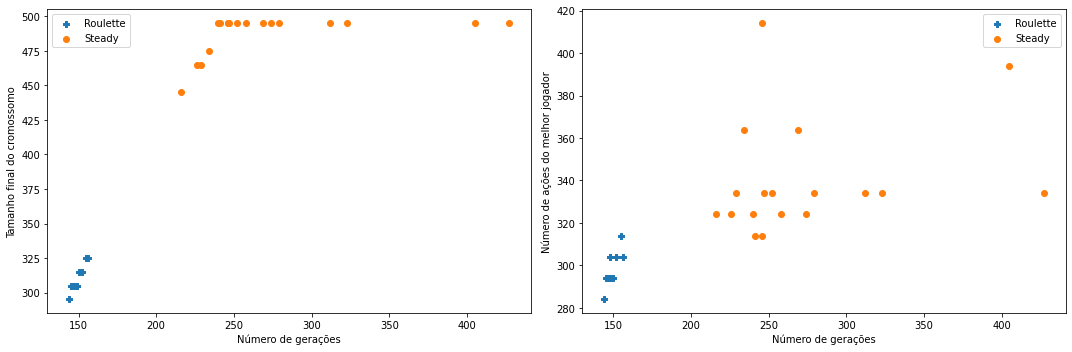

In [4]:
def make_plot_p(features, ylabels, nrows, ncols):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    i = 0
    for feature in features:
        axes[i].scatter(df_roulette['iterations'], df_roulette[feature], label="Roulette", marker='P')
        axes[i].scatter(df_steady['iterations'], df_steady[feature], label="Steady", marker='o')
        axes[i].set(ylabel=ylabels[i], xlabel='Número de gerações')
        axes[i].legend()
        plt.xticks()
        i += 1
    
    fig.tight_layout()
    plt.show()

make_plot_p(['final_state_size', 'best_number_actions'], ['Tamanho final do cromossomo', 'Número de ações do melhor jogador'], nrows=1, ncols=2)

### Simulação 1 - Sem Poison

#### Cenário 1

In [5]:
df_steady_wp = df_without_poison.loc[df_without_poison['type'] == "steady"]
df_steady_wp

,type,population_size,iterations,winners,final_state_size,best_number_actions,poison
21,steady,200,198,103,405,334,0
23,steady,200,327,100,495,324,0
25,steady,200,200,107,415,374,0
27,steady,200,311,102,495,324,0
29,steady,200,257,103,495,344,0
31,steady,200,318,101,495,374,0
33,steady,200,320,102,495,324,0
35,steady,200,262,101,495,304,0


#### Cenário 2

In [6]:
df_roulette_wp = df_without_poison.loc[df_without_poison['type'] == "roulette"]
df_roulette_wp

,type,population_size,iterations,winners,final_state_size,best_number_actions,poison
20,roulette,200,146,117,305,294,0
22,roulette,200,145,102,305,294,0
24,roulette,200,147,119,305,294,0
26,roulette,200,155,100,325,314,0
28,roulette,200,145,103,305,284,0
30,roulette,200,144,148,295,294,0
32,roulette,200,151,119,315,294,0
34,roulette,200,148,120,305,294,0
36,roulette,200,144,102,295,294,0


In [7]:
df_mean_wp = df_without_poison.groupby(["poison", "type"]).mean().round(2)
df_mean_wp

population_size  iterations  winners  final_state_size  \
poison type                                                               
0      roulette            200.0      147.22   114.44            306.11   
       steady              200.0      274.12   102.38            473.75   

                 best_number_actions  
poison type                           
0      roulette               295.11  
       steady                 337.75

Os gráficos abaixo exibem os valores melhores e médios da *fitness* em uma execução de cada um dos cenários sem a utilização do *poison*. É possível observar com maior clareza, nesse caso, a instabilidade que o *crossover*, mesmo que em uma taxa pequena, provoca nos indivíduos de cada geração. Tal comportamento não acontece no Cenário 2, no qual é possível observar o valor da *fitness* caindo de forma constante, conforme passam as gerações.

<img src="figs/sim1-withoutpoison.png" alt="s1wp"/>

### Comparação - com poison X sem poison

Diferente do que foi previsto, a utização do *poison* não trouxe melhoras na Simulação $1$, em nenhum dos cenários. Apenas a estratégia da função *fitness*, de criar dois pontos - um na área inicial e um na área final - foi suficiente para se obter resultados semelhantes e ligeiramente melhores do que penalizar o indivíduo a cada ação realizada na área inicial.

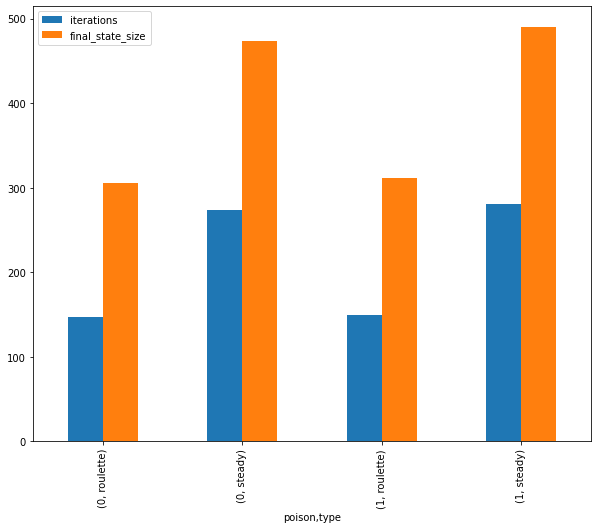

In [8]:
df_poison = df.loc[df['population_size'] == 200]
df_poison = df_poison.groupby(["poison", "type"]).mean().round(2)
df_poison.plot(y=["iterations", "final_state_size"], kind="bar",figsize=(10,8))
plt.show()

### Simulação 2

## Conclusão

Durante o desenvolvimento do trabalho, se observou que o desempenho do algoritmo genético era melhor quando os indíviduos de uma nova geração eram criados majoritariamente a partir de clonagem e mutação de seus pais, ao invés de aplicar o crossover. Tal comportamento, deve-se ao fato da ordem das ações interferirem no desempenho do jogador e a preservação da melhor sequência de ações de um jogador ser indispensável para o algoritmo encontrar a solução. Diante deste cenário, algumas mudanças nos métodos tradicionais do crossover foram aplicadas, como por exemplo, a modificação do crossover, mantendo a sequência inicial de ações dos indivíduos pais nos novos indivíduos filhos. Entretanto, pela Simulação 2, foi possível observar que mesmo com tal modificação, ao colocar uma taxa de crossover alta, a solução não foi encontrada dentro do esperado.

A principal dificuldade encontrada no desenvolvimento do algoritmo genético foi fazer os indivíduos saírem rapidamente da área inicial e entrarem na área principal do jogo. Uma função fitness simples que relaciona somente a distância entre a posição atual do jogador e algum ponto da área objetivo não foi suficiente para resolver o problema, já que tal função não induzia os jogadores a saírem da área inicial. Assim, foram feitas as estratégias de criação de dois pontos na área inicial e final e de adicionar um valor de *poison* na área inicial para, primeiramente, induzir o jogador a sair da área inicial e somente então ir em direção a área objetivo. Foi constatado que apenas a primeira estratégia foi suficiente para se obter os resultados desejados.